In [1]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Deira Aisya/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-2 Python-3.9.12 torch-1.8.2+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [8]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 2730.7ms pre-process, 576.2ms inference, 63.4ms NMS per image at shape (1, 3, 384, 640)


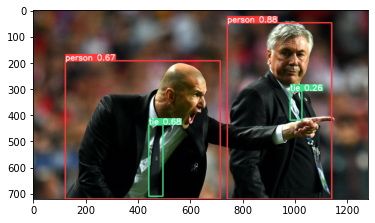

In [9]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
import uuid   # Unique identifier
import os
import time

In [13]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 25

In [14]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [14]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.65a40bca-5f23-11ed-bb22-bd086bfe1bc3.jpg


In [15]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data\images\awake.66b84cb3-5f23-11ed-98ab-bd086bfe1bc3.jpg
data\images\awake.66b84cb4-5f23-11ed-adf9-bd086bfe1bc3.jpg
data\images\awake.66b84cb5-5f23-11ed-8bbf-bd086bfe1bc3.jpg
data\images\awake.66b84cb6-5f23-11ed-b961-bd086bfe1bc3.jpg
data\images\awake.66b84cb7-5f23-11ed-aa8b-bd086bfe1bc3.jpg
data\images\awake.66b84cb8-5f23-11ed-b2c2-bd086bfe1bc3.jpg
data\images\awake.66b84cb9-5f23-11ed-bd7e-bd086bfe1bc3.jpg
data\images\awake.66b84cba-5f23-11ed-b8e8-bd086bfe1bc3.jpg
data\images\awake.66b84cbb-5f23-11ed-bdcb-bd086bfe1bc3.jpg
data\images\awake.66b84cbc-5f23-11ed-8b78-bd086bfe1bc3.jpg
data\images\awake.66b84cbd-5f23-11ed-b23a-bd086bfe1bc3.jpg
data\images\awake.66b84cbe-5f23-11ed-8212-bd086bfe1bc3.jpg
data\images\awake.66b84cbf-5f23-11ed-a554-bd086bfe1bc3.jpg
data\images\awake.66b84cc0-5f23-11ed-b278-bd086bfe1bc3.jpg
data\images\awake.66b84cc1-5f23-11ed-beeb-bd086bfe1bc3.jpg
data\images\awake.66b873e4-5f23-11ed-8468-bd086bfe1bc3.jpg
data\images\awake.66b873e5-5f23-11ed-986a-bd086bfe1bc3.j

In [16]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [17]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [18]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Deira Aisya/.cache\torch\hub\master.zip
YOLOv5  2022-11-15 Python-3.9.12 torch-1.8.2+cu111 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
img = os.path.join('data', 'images', 'Uji_Foto_3.jpg')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 720x1280 1 awake
Speed: 66.9ms pre-process, 326.9ms inference, 19.0ms NMS per image at shape (1, 3, 384, 640)


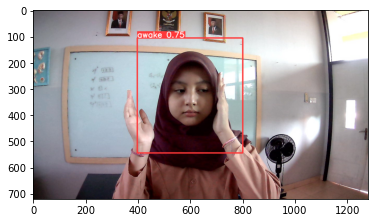

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()